In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sns
sns.set()
sns.set_palette("husl")

# Load in Matrix:

In [2]:
referenceDF = pd.read_csv('Data_To_Share/sequence_level_data_Jurkat.csv')
referenceDF_logratio = pd.read_csv('Data_To_Share/sequence_level_data_Jurkat_T0T4_logRatios.csv')

In [3]:
referenceDF.head()

,SNP,hap,ids,overlapWith,overlapWithAndSNPInside,region,seq,iscontrol,parent_control_oligo,issnp,...,parent_CDE_stem_length,ratios_T2T0,ratios_T2T0_GC_resid,ratios_T6T0,ratios_T6T0_GC_resid,effect_size_T2T0_GC_resid,effect_size_T2T0,effect_size_T6T0_GC_resid,effect_size_T6T0,parent_motif_AREs_numbered_BakheetPlus
0,rs142545439,1,subset3_1,ARE,ARE,KLHL17|1:900651-900810,CCGTTCACGTCTCTGCATCCATTCCTTCATGTCTTTATTTAGTTGT...,0,subset3_2,1,...,NaN,0.482118,0.466906,0.417303,0.495872,0.160838,0.159673,NaN,NaN,3.0
1,rs142545439,0,subset3_2,ARE,ARE,KLHL17|1:900651-900810,CCGTTCACGTCTCTGCATCCATTCCTTCATGTCTTTATTTAGTTGT...,1,subset3_2,0,...,NaN,0.322444,0.306067,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,rs142545439,mutated_ARE,subset3_3,ARE,ARE,KLHL17|1:900651-900810,CCGTTCACGTCTCTGCATCCATTCCTTCATGTCTTTATCTAGTTGT...,0,subset3_2,0,...,NaN,0.529631,0.516338,0.522858,0.606315,0.210271,0.207186,NaN,NaN,3.0
3,rs142545439,mutated_ARE,subset3_4,"ARE,AUUUA",ARE,KLHL17|1:900651-900810,CCGTTCACGTCTCTGCATCCATTCCTTCATGTCTTTATTTAGTTGT...,0,subset3_2,0,...,NaN,0.538279,0.524357,0.372625,0.454649,0.218290,0.215835,NaN,NaN,3.0
4,rs182655016,1,subset3_5,ARE,ARE,B3GALT6|1:1169044-1169203,AAATGTAACTCAGTGTTTGCTTGCGACTTATTTATAAATATTATAA...,0,subset3_6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


## CDE_Stem_Length

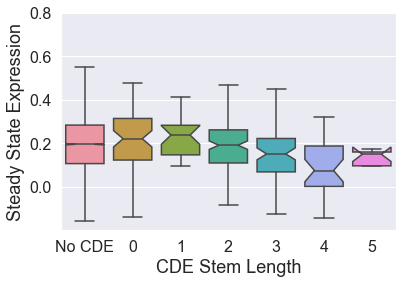

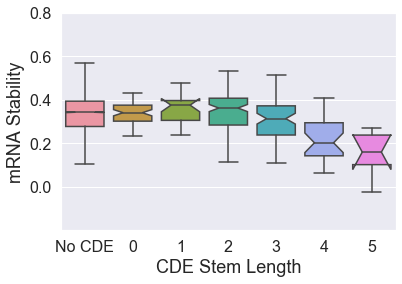

In [4]:
ax = sns.boxplot(x="CDE_stem_lengths",y="ratios_T0_GC_resid",data=referenceDF[referenceDF.iscontrol==1],notch=True,fliersize=0)
ax.set_xticklabels(['No CDE','0','1','2','3','4','5'],fontsize=16)
ax.set_yticklabels(['','0.0','0.2','0.4','0.6','0.8','1.0'],fontsize=16)
plt.xlabel('CDE Stem Length',fontsize=18)
plt.ylabel('Steady State Expression',fontsize=18)
plt.ylim(0,1)
plt.show()


ax = sns.boxplot(x="CDE_stem_lengths",y="ratios_T4T0_GC_resid",data=referenceDF[referenceDF.iscontrol==1],notch=True,fliersize=0)
ax.set_xticklabels(['No CDE','0','1','2','3','4','5'],fontsize=16)
ax.set_yticklabels(['','0.0','0.2','0.4','0.6','0.8','1.0'],fontsize=16)
plt.xlabel('CDE Stem Length',fontsize=18)
plt.ylabel('mRNA Stability',fontsize=18)
plt.ylim(0,1)
plt.show()

In [5]:
print(st.linregress(referenceDF[~pd.isnull(referenceDF.ratios_T0_GC_resid)&(referenceDF.iscontrol==1)&(referenceDF.CDE_stem_lengths>-.5)].CDE_stem_lengths,referenceDF[~pd.isnull(referenceDF.ratios_T0_GC_resid)&(referenceDF.iscontrol==1)&(referenceDF.CDE_stem_lengths>-.5)].ratios_T0_GC_resid))
print(st.linregress(referenceDF[~pd.isnull(referenceDF.ratios_T4T0_GC_resid)&(referenceDF.iscontrol==1)&(referenceDF.CDE_stem_lengths>-.5)].CDE_stem_lengths,referenceDF[~pd.isnull(referenceDF.ratios_T4T0_GC_resid)&(referenceDF.iscontrol==1)&(referenceDF.CDE_stem_lengths>-.5)].ratios_T4T0_GC_resid))

LinregressResult(slope=-0.02542039528802547, intercept=0.42576648824238467, rvalue=-0.2529517604814934, pvalue=1.244566480785413e-06, stderr=0.0051530112771363224)
LinregressResult(slope=-0.02305863136460008, intercept=0.5675814967857623, rvalue=-0.2777019345593886, pvalue=2.8278623032058407e-07, stderr=0.004397741260338805)


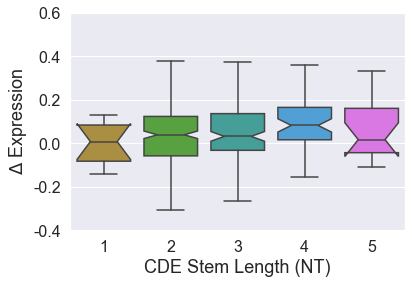

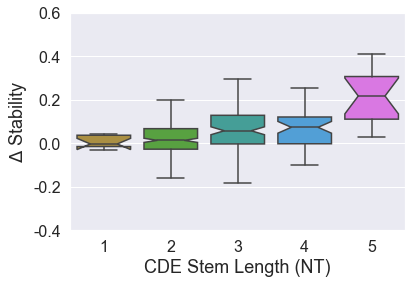

In [6]:
ax = sns.boxplot(x="parent_CDE_stem_length",y="effect_size_T0_GC_resid",data=referenceDF[referenceDF.hap=='mutated_CDE'],notch=True,fliersize=0)
ax.set_xticklabels(['0','1','2','3','4','5'],fontsize=16)
ax.set_yticklabels(['-0.4','-0.2','0.0','0.2','0.4','0.6'],fontsize=16)
plt.xlabel('CDE Stem Length (NT)',fontsize=18)
plt.ylabel('$\Delta$ Expression',fontsize=18)
plt.ylim(-.4,.6)
plt.xlim(0.5,5.5)
plt.show()


ax = sns.boxplot(x="parent_CDE_stem_length",y="effect_size_T4T0_GC_resid",data=referenceDF[referenceDF.hap=='mutated_CDE'],notch=True,fliersize=0)
ax.set_xticklabels(['0','1','2','3','4','5'],fontsize=16)
ax.set_yticklabels(['-0.4','-0.2','0.0','0.2','0.4','0.6'],fontsize=16)
plt.xlabel('CDE Stem Length (NT)',fontsize=18)
plt.ylabel('$\Delta$ Stability',fontsize=18)
plt.ylim(-.4,.6)
plt.xlim(0.5,5.5)
plt.show()

In [7]:
print(st.linregress(referenceDF[~pd.isnull(referenceDF.effect_size_T0_GC_resid)&(referenceDF.hap=='mutated_CDE')&(referenceDF.CDE_stem_lengths>-.5)].parent_CDE_stem_length,referenceDF[~pd.isnull(referenceDF.effect_size_T0_GC_resid)&(referenceDF.hap=='mutated_CDE')&(referenceDF.parent_CDE_stem_length>-.5)].effect_size_T0_GC_resid))
print(st.linregress(referenceDF[~pd.isnull(referenceDF.effect_size_T4T0_GC_resid)&(referenceDF.hap=='mutated_CDE')&(referenceDF.CDE_stem_lengths>-.5)].parent_CDE_stem_length,referenceDF[~pd.isnull(referenceDF.effect_size_T4T0_GC_resid)&(referenceDF.hap=='mutated_CDE')&(referenceDF.parent_CDE_stem_length>-.5)].effect_size_T4T0_GC_resid))

LinregressResult(slope=0.021053092925398167, intercept=-0.011158141030369752, rvalue=0.1317427497450425, pvalue=0.0031638002898333934, stderr=0.007098597992289809)
LinregressResult(slope=0.042416639355839406, intercept=-0.06252833526730459, rvalue=0.33895449394983584, pvalue=1.9998913310385e-13, stderr=0.0055936022904107575)


# CDE Stem Length, log ratio instead of R/(R+D):

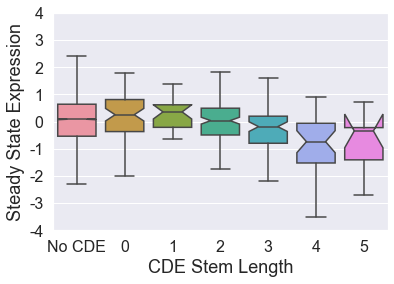

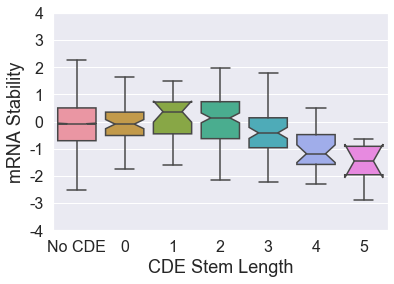

In [12]:
ax = sns.boxplot(x="CDE_stem_lengths",y="ratios_T0_GC_resid",data=referenceDF_logratio[referenceDF_logratio.iscontrol==1],notch=True,fliersize=0)
ax.set_xticklabels(['No CDE','0','1','2','3','4','5'],fontsize=16)
ax.set_yticklabels(['-4','-3','-2','-1','0','1','2','3','4'],fontsize=16)
plt.xlabel('CDE Stem Length',fontsize=18)
plt.ylabel('Steady State Expression',fontsize=18)
plt.ylim(-4,4)
plt.show()


ax = sns.boxplot(x="CDE_stem_lengths",y="ratios_T4T0_GC_resid",data=referenceDF_logratio[referenceDF_logratio.iscontrol==1],notch=True,fliersize=0)
ax.set_xticklabels(['No CDE','0','1','2','3','4','5'],fontsize=16)
ax.set_yticklabels(['-4','-3','-2','-1','0','1','2','3','4'],fontsize=16)
plt.xlabel('CDE Stem Length',fontsize=18)
plt.ylabel('mRNA Stability',fontsize=18)
plt.ylim(-4,4)
plt.show()

In [13]:
print(st.linregress(referenceDF_logratio[~pd.isnull(referenceDF_logratio.ratios_T0_GC_resid)&(referenceDF_logratio.iscontrol==1)&(referenceDF_logratio.CDE_stem_lengths>-.5)].CDE_stem_lengths,referenceDF_logratio[~pd.isnull(referenceDF_logratio.ratios_T0_GC_resid)&(referenceDF_logratio.iscontrol==1)&(referenceDF_logratio.CDE_stem_lengths>-.5)].ratios_T0_GC_resid))
print(st.linregress(referenceDF_logratio[~pd.isnull(referenceDF_logratio.ratios_T4T0_GC_resid)&(referenceDF_logratio.iscontrol==1)&(referenceDF_logratio.CDE_stem_lengths>-.5)].CDE_stem_lengths,referenceDF_logratio[~pd.isnull(referenceDF_logratio.ratios_T4T0_GC_resid)&(referenceDF_logratio.iscontrol==1)&(referenceDF_logratio.CDE_stem_lengths>-.5)].ratios_T4T0_GC_resid))

LinregressResult(slope=-0.21951764860601364, intercept=0.22227890840037473, rvalue=-0.23402991310216573, pvalue=7.646032724961473e-06, stderr=0.04833278495862123)
LinregressResult(slope=-0.2027928595417245, intercept=0.22272377010544714, rvalue=-0.26500795385885867, pvalue=1.003867333460927e-06, stderr=0.04068026272260972)


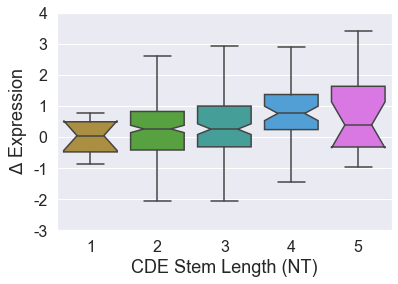

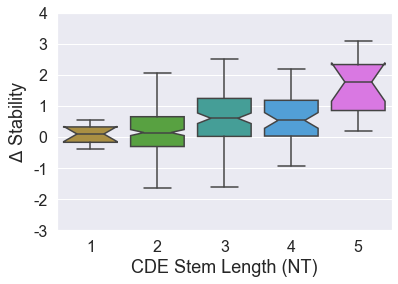

In [18]:
ax = sns.boxplot(x="parent_CDE_stem_length",y="effect_size_T0_GC_resid",data=referenceDF_logratio[referenceDF_logratio.hap=='mutated_CDE'],notch=True,fliersize=0)
ax.set_xticklabels(['0','1','2','3','4','5'],fontsize=16)
ax.set_yticklabels(['-3','-2','-1','0','1','2','3','4'],fontsize=16)
plt.xlabel('CDE Stem Length (NT)',fontsize=18)
plt.ylabel('$\Delta$ Expression',fontsize=18)
plt.ylim(-3,4)
plt.xlim(0.5,5.5)
plt.show()


ax = sns.boxplot(x="parent_CDE_stem_length",y="effect_size_T4T0_GC_resid",data=referenceDF_logratio[referenceDF_logratio.hap=='mutated_CDE'],notch=True,fliersize=0)
ax.set_xticklabels(['0','1','2','3','4','5'],fontsize=16)
ax.set_yticklabels(['-3','-2','-1','0','1','2','3','4'],fontsize=16)
plt.xlabel('CDE Stem Length (NT)',fontsize=18)
plt.ylabel('$\Delta$ Stability',fontsize=18)
plt.ylim(-3,4)
plt.xlim(0.5,5.5)
plt.show()

In [19]:
print(st.linregress(referenceDF_logratio[~pd.isnull(referenceDF_logratio.effect_size_T0_GC_resid)&(referenceDF_logratio.hap=='mutated_CDE')&(referenceDF_logratio.CDE_stem_lengths>-.5)].parent_CDE_stem_length,referenceDF_logratio[~pd.isnull(referenceDF_logratio.effect_size_T0_GC_resid)&(referenceDF_logratio.hap=='mutated_CDE')&(referenceDF_logratio.parent_CDE_stem_length>-.5)].effect_size_T0_GC_resid))
print(st.linregress(referenceDF_logratio[~pd.isnull(referenceDF_logratio.effect_size_T4T0_GC_resid)&(referenceDF_logratio.hap=='mutated_CDE')&(referenceDF_logratio.CDE_stem_lengths>-.5)].parent_CDE_stem_length,referenceDF_logratio[~pd.isnull(referenceDF_logratio.effect_size_T4T0_GC_resid)&(referenceDF_logratio.hap=='mutated_CDE')&(referenceDF_logratio.parent_CDE_stem_length>-.5)].effect_size_T4T0_GC_resid))

LinregressResult(slope=0.22092568059210435, intercept=-0.19994203755459955, rvalue=0.1660940988990208, pvalue=0.00019100518009373363, stderr=0.058776354972885504)
LinregressResult(slope=0.3423216176339456, intercept=-0.4418496508182941, rvalue=0.32003901123623163, pvalue=4.680529877787024e-12, stderr=0.04814652244086553)
